# What are images?

https://www.youtube.com/watch?v=eDIj5LuIL4A&t=5524s

In [28]:
import cv2
import os
import numpy as np

In [2]:
fox_img = cv2.imread("fox.png")

In [3]:
# Images are essentially numpy arrays
type(fox_img)

numpy.ndarray

In [4]:
print(fox_img.shape)
# 512 512 3
# height width number_of_channels

(512, 512, 3)


<p>Number of channels of an image:</p>

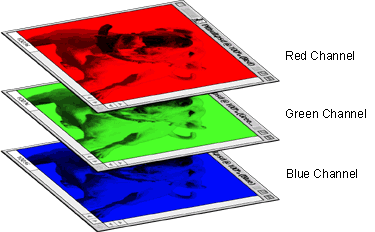

<p>An image is made by "pixels"</p>

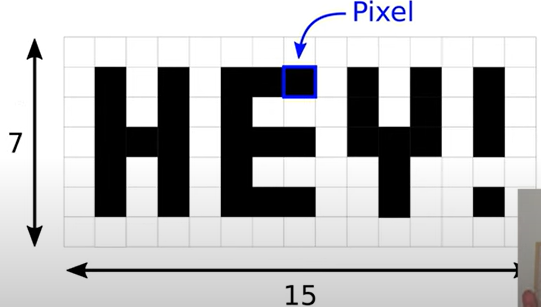

<ul>
<li>In "most cases" pixel value range from 0 to 255.</li>
<li>In binary images, pixel value is in [0, 1] (or [0, 255]). In this case, every single pixel will be either black or white. So, 0 is black pixel, and 1 or 255 is white pixel</li>
<li>In 16 bits imgaes pixel value range from 0 to 65535.</li>
</ul>

# Input / Output

## Image

In [5]:
# read image
image_path = os.path.join('.','fox.png')

img = cv2.imread(image_path)
# write image
cv2.imwrite(os.path.join('.','fox_out.png'), img)

True

In [7]:
# visualize image
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Video

In [6]:
# read video
video_path = os.path.join('.','video.mp4')

In [7]:
video = cv2.VideoCapture(video_path)

In [10]:
# visualize video
ret = True
while ret:
    ret, frame = video.read()
    # frame is the actual frame that is read.
    # ret will record if the frame is read successfully.
    if ret:
        cv2.imshow('video', frame)
        cv2.waitKey(40)
    else:
        video.release()
        cv2.destroyAllWindows()

## Webcam

In [8]:
# read webcam
webcam = cv2.VideoCapture(0)
# the number indicates the id of the webcam you are going to use.

In [12]:
# visualize webcam
ret = True
while True:
    ret, frame = webcam.read()
    cv2.imshow('webcam', frame)
    if cv2.waitKey(40) & 0xFF == ord("q"):
        break
webcam.release()
cv2.destroyAllWindows()

# Basic Operations

In [11]:
# Resize image
ret = True
while ret:
    resized_img = cv2.resize(img, (100,100))
    cv2.imshow('image1', img)    
    cv2.imshow('image2', resized_img)
    cv2.waitKey(0)
    if cv2.waitKey(0) & 0xFF == ord("q"):
        ret = False
        cv2.destroyAllWindows()
        break

In [ ]:
img.shape

In [21]:
# Crop image
ret = True
while ret:
    cropped_img = img[100:400, 200:500]
    cv2.imshow('image1', img)    
    cv2.imshow('image2', cropped_img)
    cv2.waitKey(0)
    if cv2.waitKey(0) & 0xFF == ord("q"):
        ret = False
        cv2.destroyAllWindows()
        break

# Colorspace

In [16]:
# cv2. cvtColor() method is used to convert an image from one color space to another. 
ret = True
while ret:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # HSV

    cv2.imshow('image1', img)    
    cv2.imshow('image2', img_rgb)
    cv2.imshow('image3', img_gry)
    cv2.imshow('image4', img_hsv)

    cv2.waitKey(0)
    if cv2.waitKey(0) & 0xFF == ord("q"):
        ret = False
        cv2.destroyAllWindows()
        break

# Blur
- blur()
- GaussianBlur()
- medianBlur()
- bllateralFilter()

<div>
<b>cv2.blur(src, ksize, anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)</b>

- src: Input image.
- ksize: The size of the kernel used for blurring. It is a tuple of two integers, representing the width and height of the kernel.
- anchor: A point that defines the anchor of the kernel; the default value is the center of the kernel.
- borderType: Pixel extrapolation method (how to extrapolate pixels outside the image).
</div>

<div>
<b>cv2.GaussianBlur(src, ksize, sigmaX, sigmaY=None, borderType=None)</b>

- src: The source image that you want to blur.
- ksize: The size of the Gaussian kernel. This must be a tuple of two integers (width, height) which should both be positive and odd. In your case, k_size is used for both width and height, indicating a square kernel.
- sigmaX: The standard deviation of the Gaussian kernel in the X direction. This is the 3 in your code snippet. A higher sigma value results in more blurring because the Gaussian kernel will have a wider spread. In Gaussian blurring, the kernel weights decrease with distance from the central pixel, and sigma controls the rate of this fall-off.
- sigmaY (optional): The standard deviation in the Y direction; if not specified, it is taken as equal to sigmaX.
- borderType (optional): A flag that defines how the border of the image is handled during the operation.
</div>

<div>
<b>cv2.medianBlur(src, ksize)</b>

- src: Input image.
- ksize: Aperture linear size; it must be odd and greater than 1, e.g., 3, 5, 7...
</div>

In [9]:
wolf = cv2.imread("wolf.png")

In [24]:
wolf.shape

(903, 1280, 3)

In [10]:
# resize the wolf image
width = int(wolf.shape[1] * 0.5)
height = int(wolf.shape[0] * 0.5)
wolfn = cv2.resize(wolf, (width, height))

In [36]:
ret = True
k_size = 7
# the larger the number the blurer the image is.

while ret:
    blurred_gau = cv2.GaussianBlur(wolfn,(k_size,k_size),3)
    blurred_med = cv2.medianBlur(wolfn,(k_size))
    blurred = cv2.blur(wolfn, (k_size, k_size))

    cv2.imshow('image', wolfn)
    cv2.imshow('image blurred', blurred)    
    cv2.imshow('image gaussian blur', blurred_gau)
    cv2.imshow('image median blur', blurred_med)

    cv2.waitKey(0)
    if cv2.waitKey(0) & 0xFF == ord("q"):
        ret = False
        cv2.destroyAllWindows()
        break

# Threshold

[Change images into binary image.](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

In [24]:
# Convert image to grayscale.
img_wolf_gray_scale = cv2.cvtColor(wolfn, cv2.COLOR_BGR2GRAY)
# Convert grayscale to simple threshold picture. 
sto, img_wolf_threshold = cv2.threshold(img_wolf_gray_scale, 80, 255, cv2.THRESH_BINARY)
# Blurred the simple threshold picture.
blurred_threshold = cv2.blur(img_wolf_threshold, (10, 10))
# Convert the blurred threshold picture back to threshold picture.
sto2, threshold_blurred_threshold = cv2.threshold(blurred_threshold, 80, 255, cv2.THRESH_BINARY)
    # 80 is the number that all the pixels lower than it will = 0. 
    # And all the pixels higher than it will have a value of 255.
# Convert grayscale to adaptive threshold picture.
test_img = cv2.adaptiveThreshold(img_wolf_gray_scale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 30)
    # the input has to be in grayscale!
    # 21 => it has to be an odd number.

ret = True
while ret:
    cv2.imshow('image', wolfn)
    cv2.imshow('image_threshold1', img_wolf_threshold)
    cv2.imshow('image_threshold2', threshold_blurred_threshold)
    cv2.imshow('image_adaptive_threshold', test_img)

    key = cv2.waitKey(0)
    if key & 0xFF == ord("q"):
        ret = False
        cv2.destroyAllWindows()
        break

## Adaptive Threshold
Adaptive thresholding is a sophisticated method of converting a grayscale image into a binary image, which is particularly useful when dealing with images that have varying lighting conditions across different areas. Unlike simple thresholding, which applies a single threshold value to the entire image, adaptive thresholding adjusts the threshold dynamically over the image based on local image characteristics.

<b>test = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 20, 30)</b>

- img:

This is just the photo you're starting with. It's like picking which coloring book page you want to color.

- 255:

This number is the brightest white you can have. It's saying, "If we decide to color a spot, we're going to use the brightest white crayon in the box."

- cv2.ADAPTIVE_THRESH_GAUSSIAN_C:

This is a smart way to look at each little part of the picture (we call each part a 'patch'). Instead of just looking at the patch itself, it also considers the patches around it—kind of like deciding how to dress based on both the weather today and the forecast for the whole week.

- cv2.THRESH_BINARY:

This tells the tool to make a clear choice for each spot in the picture: either color it black (0) or white (255), nothing in between. It’s like using a stamp that only has black ink or no ink.

- 20 (Block Size):

This number tells us how big each patch should be. A block size of 20 means we're looking at 20x20 pixel squares of the picture at a time. This is your focus area when deciding if a part should be black or white.

- 30 (Constant C):

This is a special tweak to help make better decisions. We subtract this number (30) from the average lightness we calculate in each patch. It's like saying, "Even if this patch is pretty bright, let's make sure it's really bright before we decide to color it white."

# Edge Detection

## Edge Detection
https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

The cv2.Canny() function in OpenCV is used to perform Canny edge detection on an image. It identifies edges in the image by detecting rapid changes in pixel intensity, and it uses two threshold values to control this process.

cv2.Canny(image, threshold1, threshold2)

1. image (Input Image)

- This is the image you want to process. It should be a grayscale image (2D array of pixel intensities).

2. threshold1 (Lower Threshold)

- This is the lower threshold for edge detection. It defines the minimum gradient value that will be considered as an edge.

- Pixels with gradient values below threshold1 are discarded as not being part of an edge.

- Pixels with gradient values above threshold2 are accepted as part of an edge

3. threshold2 (Upper Threshold)

- This is the upper threshold for edge detection. It defines the maximum gradient value for an edge to be considered.

- Pixels with gradient values above threshold2 are always considered part of an edge.

- If a pixel’s gradient is between threshold1 and threshold2, the algorithm will decide whether it’s part of an edge based on its connectivity to a pixel above threshold2.

4. How the Thresholds Work Together:

- Strong edges: If the gradient is greater than threshold2, the pixel is sure to be part of an edge.

- Weak edges: If the gradient is between threshold1 and threshold2, the pixel is considered a weak edge, and it will only be included if it's connected to a strong edge.

- Non-edges: If the gradient is below threshold1, the pixel is not considered an edge.

## Imgae Dilation
What is Dilation in Image Processing?

Dilation is a morphological operation in image processing that expands the white regions in a binary image. It is often used to thicken or enhance edges, fill small holes, and connect nearby structures in an image.

In the context of edge detection, dilation can make edges more prominent and might connect edge fragments that are slightly separated. It can be useful when you want to emphasize the boundaries of objects in an image.

## Image Erode
The erosion operation is one of the basic morphological operations in image processing, and it is used to shrink or reduce the white (foreground) regions of a binary image. In other words, it reduces the size of the bright (white) areas, which can be useful for removing noise or unwanted small details.

In [31]:
image_edge = cv2.Canny(wolfn, 100, 300)
image_edge2 = cv2.Canny(img_wolf_gray_scale, 100, 300)
image_edge_dilate = cv2.dilate(image_edge, np.ones((5,5), dtype=np.int8))
image_edge_erode = cv2.erode(image_edge_dilate, np.ones((2,2), dtype=np.int8))
ret = True
while ret:
    cv2.imshow('image', wolfn)
    cv2.imshow('image_edge', image_edge)
    cv2.imshow('image_edge2', image_edge2)
    cv2.imshow('image_edge_dilate', image_edge_dilate)
    cv2.imshow('image_edge_erode', image_edge_erode)

    key = cv2.waitKey(0)
    if key & 0xFF == ord("q"):
        ret = False
        cv2.destroyAllWindows()
        break

Notes:

<code>np.ones((5, 5), dtype=np.int8)</code>: 

This creates a 5x5 matrix (a square kernel) where all values are 1. In other words, the structuring element is a 5x5 matrix of ones.

Each "1" in this matrix represents a part of the neighborhood surrounding a pixel that is considered for the dilation process.

A 5x5 kernel means that the dilation will consider a pixel and its 24 neighbors (the 5x5 area around each pixel).

# Drawing

In [39]:
cv2.line(img, (100, 150), (300, 450), (0, 255, 0), 3)
    # cv2.line(img, (start point), (end point), (color), thickness)
cv2.rectangle(img, (100, 200), (450, 600), (0, 0, 255), 5)

cv2.circle(img, (200, 200), 20, (255, 255, 0), -1)

cv2.putText(img, "Hello, OpenCV!", (100, 500), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
ret = True
while ret:
    cv2.imshow('image', img)
    
    key = cv2.waitKey(0)
    if key & 0xFF == ord("q"):
        ret = False
        cv2.destroyAllWindows()
        break

# Contour

In the context of image processing, particularly with libraries such as OpenCV, a "contour" is a curve joining all the continuous points (along the boundary), having the same color or intensity. Contours are a useful tool for shape analysis and object detection and recognition.

In [54]:
img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sto2, thresh = cv2.threshold(img_gry, 127, 255, cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
ret = True
while ret:
    for cnt in contours:
        if cv2.contourArea(cnt)>200:
            # cv2.drawContours(img, cnt, -1, (0, 255, 0), 3)
            x, y, w, h = cv2.boundingRect(cnt)  # Correct the unpacking here
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow('image', img)
    cv2.imshow('image thresh', thresh)
    key = cv2.waitKey(0)
    if key & 0xFF == ord("q"):
        ret = False
        cv2.destroyAllWindows()
        break

What Contours Contain:

Contour Points:

Each contour is essentially a list (or array) of points that form a curve or boundary of an object in the image. These points are stored in a NumPy array with coordinates corresponding to the image points.
Hierarchical Information (optional):

When you use modes like cv2.RETR_TREE, OpenCV also returns a hierarchy that describes the child-parent relationships between contours. This is useful for complex image structures where contours are nested within each other.
The hierarchy returned by findContours is a NumPy array containing elements [Next, Previous, First_Child, Parent] for each contour, which helps in navigating through the contours based on their relationships.
How Contours Are Used:
Drawing Contours:

You can visualize contours by drawing them back onto images. The function cv2.drawContours can be used to draw each detected contour on the source image or a blank image for visualization purposes.
For example, cv2.drawContours(img, contours, -1, (0, 255, 0), 3) would draw all contours on the image img with green color and a thickness of 3 pixels.
Bounding Rectangles:

You can calculate the bounding box for each contour, which gives you the (x, y) coordinates of the top-left corner and the width (w) and height (h) of the rectangle.
This is done using cv2.boundingRect(cnt), which is useful for object detection and localization within an image.
Area Calculation:

The function cv2.contourArea(cnt) calculates the area of the contour, which can be useful for filtering out noise based on the size of the detected regions.